# Play Store Data Analysis #

Problem Statement : Google Play Store team is about to launch a new feature where in certain apps that are
promising are boosted in visibility.These will also get a boost in visibility in search results. This feature will help bring more attention to newer apps that have potential.

Analyze the data and present your insights in a format consumable by
business – the final output of the analysis would be presented to business as insights with
supporting data/visualizations.

## Import Libraries ##


Let's import the required libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Load the dataset and check for shape, sample and Null values in the dataset.

In [4]:
data = pd.read_csv('playstore.csv')
data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1384,Nike Training Club - Workouts & Fitness Plans,HEALTH_AND_FITNESS,4.6,251534,93000.000000,"10,000,000+",Free,0,Everyone,Health & Fitness,"July 18, 2018",5.14.0,5.0 and up
7894,Interactive CT and MRI Anatomy,MEDICAL,3.4,35,24000.000000,"1,000+",Paid,$15.46,Everyone,Medical,"May 27, 2015",2.0.3,2.2 and up
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,21516.529524,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
4776,iLauncher OS 12 Pro - Phone X,PERSONALIZATION,NaN,3,9600.000000,50+,Paid,$2.99,Everyone,Personalization,"June 24, 2018",1.0.1,4.1 and up
7124,Channel 19,COMMUNICATION,3.7,916,12000.000000,"100,000+",Free,0,Mature 17+,Communication,"July 13, 2018",2.2.6,4.1 and up


In [5]:
data.shape

(10841, 13)

In [6]:
data.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


Above observation suggests out of 13 columns only 2 columns contain numerical values.

Lets check for Null or missing values

In [7]:
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Data clean up – Missing value treatment

### Drop records where rating is missing since rating is our target/study variable

In [8]:
data.dropna(subset=['Rating'],axis='rows', inplace = True)

In [9]:
data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

### Check the null values for the Android Ver column

In [10]:
pd.isnull(data['Android Ver']).sum()

3

In [11]:
data[data['Android Ver'].isnull()] # Displaying rows with NaN values

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


__Out of 3 NaN Values in 'Android Ver' column, Index-10472 seems to be Erratic as compared to other 2 columns__

#### Drop the 3rd record i.e. record for “Life Made WIFI …”

In [12]:
i = data[((data.App == 'Life Made WI-Fi Touchscreen Photo Frame') & (data['Android Ver'].isnull()))].index
print(i)
data.drop(i,inplace = True)

Int64Index([10472], dtype='int64')


In [13]:
data[data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


__Record with index no. 10472 is deleted__

#### Lets replace remaining missing values with the mode of the column

In [14]:
data['Android Ver'].mode() # Mode of 'Android Ver' column

0    4.1 and up
dtype: object

In [15]:
data['Android Ver'] = data.fillna({'Android Ver':data['Android Ver'].mode()})

In [16]:
data[data['Android Ver'].isnull()] ## Recheck for Null values

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


So now we don't have any Null values in 'Android Ver' column.



### Let's replace Null values in 'Current Ver' with mode ###

In [17]:
pd.isnull(data['Current Ver']).sum()

4

In [18]:
data[data['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,Learn To Draw Kawaii Characters
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,Market Update Helper
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,Virtual DJ Sound Mixer
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,Dots puzzle


In [19]:
data['Current Ver'] = data.fillna({'Current Ver':data['Current Ver'].mode()})

In [20]:
data.isna().sum() # Reconfirming all for zero Null values

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [21]:
data.shape

(9366, 13)

## Data clean up – Correcting the data types

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
App               9366 non-null object
Category          9366 non-null object
Rating            9366 non-null float64
Reviews           9366 non-null object
Size              9366 non-null float64
Installs          9366 non-null object
Type              9366 non-null object
Price             9366 non-null object
Content Rating    9366 non-null object
Genres            9366 non-null object
Last Updated      9366 non-null object
Current Ver       9366 non-null object
Android Ver       9366 non-null object
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


__As we can see v ariables such as Reviews, Installs, Price contain numeric values but are having datatype as object, it needs to be corrected to numeric data types__ 

__But before doing that lets get rid of dollar sign in 'Price' columns and then convert its data type to float__

In [26]:
data['Price'].sample(5) ## Values in Price col with $ sign

7462    0
7621    0
7613    0
4681    0
8196    0
Name: Price, dtype: object

In [27]:
data['Price'] = data.Price.apply(lambda x: x.replace('$','')).astype(float)

# Alternate code : data['Price'] = data['Price'].str.replace('$','').astype(dtype='float')

In [28]:
data['Price'].sample(5) ## Values in Price col without $ sign

# Alternate code : data.sample(n=5, weights='Price') 

10634    0.0
1298     0.0
7491     0.0
8949     0.0
5438     0.0
Name: Price, dtype: float64

__Similarly get rid of '+' & ',' signs in 'Installs' columns and then convert its data type to 'Int'__

In [29]:
data['Installs'].sample(5)

9274      100000
8930     1000000
6431       10000
3676    10000000
8312    10000000
Name: Installs, dtype: int32

In [ ]:
data['Installs'] = data.Installs.apply(lambda x: x.replace(',',''))
data['Installs'] = data.Installs.apply(lambda x: x.replace('+',''))

In [ ]:
data['Installs'] = data.Installs.apply(lambda x: x.strip()).astype(int)

In [32]:
data['Installs'].sample(5)

8666       1000000
453        5000000
10362      1000000
4812     100000000
7988        500000
Name: Installs, dtype: int32

__Convert all other identified columns to numeric data types__

In [33]:
data['Rating'] = data[['Rating']].astype(float)
data['Reviews'] = data[['Reviews']].astype(int)
data['Size'] = data[['Size']].astype(int)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   int32  
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), int32(3), object(8)
memory usage: 914.6+ KB


## Sanity checks –

### Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

#### Are there any such records? Drop if so.

In [31]:
(data['Rating']>5).sum()

0

No such record exists.

### Reviews should not be more than installs as only those who installed can review the app.

#### Are there any such records? Drop if so.

In [32]:
(data['Reviews'] > data['Installs']).sum()

7

In [33]:
data.drop(data[data['Reviews'] > data['Installs']].index, axis=0, inplace=True)

In [34]:
(data['Reviews'] > data['Installs']).sum()

0

## Identify and handle outliers

### Price column

__Lets plot a graph to identify outliers in Price columns__

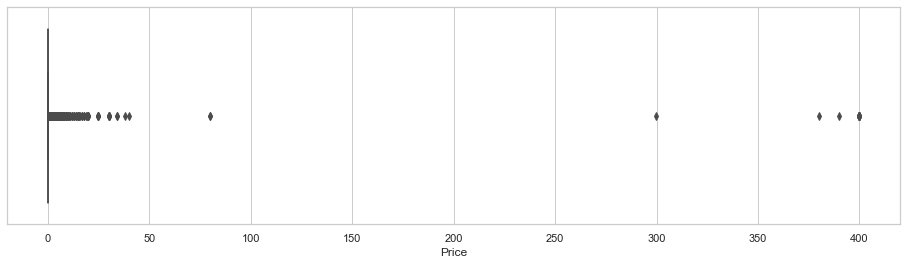

In [35]:
plt.figure(figsize=(16, 4))
sns.set(style="whitegrid")
sns.boxplot(x='Price',data=data,palette='Set1');

___It can be seen from the plot that data in Price column lie between 0 to 50 except few outliers.___

__We need to get rid of these outliers by dropping these rows__

In [35]:
(data['Price']>200).sum()

15

In [36]:
data.drop(data[data['Price']>200].index, axis=0, inplace=True)

In [37]:
(data['Price']>200).sum()

0

__After dropping the useless records, lets make the suitable plot again to identify further outliers__

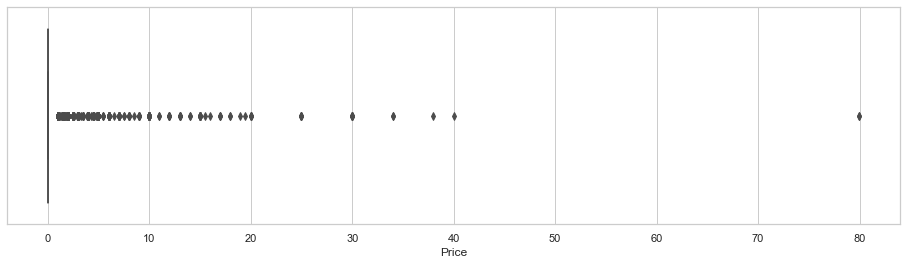

In [38]:
plt.figure(figsize=(16, 4))
sns.set(style="whitegrid")
sns.boxplot(x='Price',data=data,palette='Set1');

__As we can see majority if data in Price column is lying between 0-30 lets limit data to records with price < $30__

In [39]:
(data['Price']>=30).sum()

6

In [40]:
data.drop(data[data['Price']>=30].index, axis=0, inplace=True)

In [41]:
(data['Price']>=30).sum()

0

### Reviews column

#### Make suitable plot for Review column 

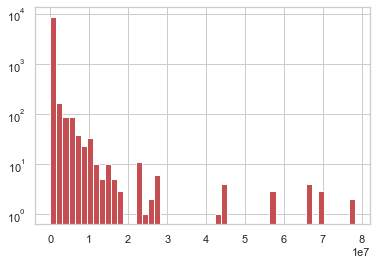

In [42]:
plt.hist(x='Reviews',bins=50,color='r',data=data,alpha = 1,log=True);

#### Limit data to apps with < 1 Million reviews

In [44]:
(data['Reviews']>=1000000).sum()

704

In [45]:
data.drop(data[data['Reviews']>1000000].index, axis=0, inplace=True)

In [46]:
(data['Reviews']>=1000000).sum()

0

### Installs

#### What is the 95th percentile of the installs?

In [47]:
quant = data['Installs'].quantile(0.95)
quant 

10000000.0

#### Drop records having a value more than the 95th percentile

In [48]:
(data['Installs']>quant).sum()

199

In [49]:
data.drop(data[data['Installs']>quant].index, axis=0, inplace=True)

In [50]:
(data['Installs']>quant).sum()

0

## Data analysis to answer business questions:

### What is the distribution of ratings like? More skewed towards higher/lower values?

__Let's plot a histogram to check the Skewness and Kurtosis of the Ratings column__

Skewness: -1.853781
Kurtosis: 5.805024


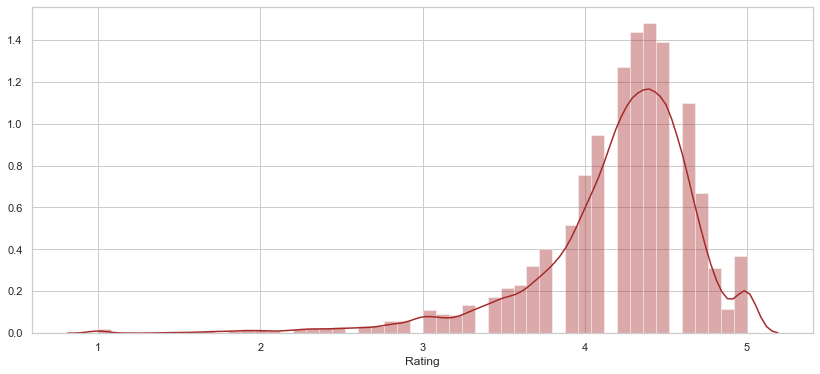

In [43]:
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")
sns.distplot(data['Rating'] , color="brown")
print("Skewness: %f" % data['Rating'].skew())
print("Kurtosis: %f" % data['Rating'].kurt())

It's clearly seen from the plot that the distribution of __'Ratings'__ displays __'Negative Skewness' and 'Leptokurtic Kurtosis'.__

__Negative Skewness depicts 'Ratings' data is highly skewed towards higher values i.e between 4 to 5__

## What are the top Content Rating values?

### Are there any values with very few records?

In [52]:
data.groupby('Content Rating').count()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver
Content Rating,,,,,,,,,,,,
Adults only 18+,3,3,3,3,3,3,3,3,3,3,3,3
Everyone,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782
Everyone 10+,332,332,332,332,332,332,332,332,332,332,332,332
Mature 17+,417,417,417,417,417,417,417,417,417,417,417,417
Teen,900,900,900,900,900,900,900,900,900,900,900,900
Unrated,1,1,1,1,1,1,1,1,1,1,1,1


It can be seen from above that 'Adults only 18+' & 'Unrated' indices have very few records, 3 & 1 respectively.

Let's drop these as they won’t help in the analysis

In [44]:
data.drop(data[(data["Content Rating"]=='Adults only 18+')].index,axis=0,inplace=True)
data.drop(data[(data["Content Rating"]=='Unrated')].index,axis=0,inplace=True)

In [45]:
data.groupby('Content Rating').count()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver
Content Rating,,,,,,,,,,,,
Everyone,7400,7400,7400,7400,7400,7400,7400,7400,7400,7400,7400,7400
Everyone 10+,397,397,397,397,397,397,397,397,397,397,397,397
Mature 17+,461,461,461,461,461,461,461,461,461,461,461,461
Teen,1083,1083,1083,1083,1083,1083,1083,1083,1083,1083,1083,1083


'Adults only 18+' & 'Unrated' have been dropped.

## Effect of size on rating

### Make a joinplot to understand the effect of size on rating

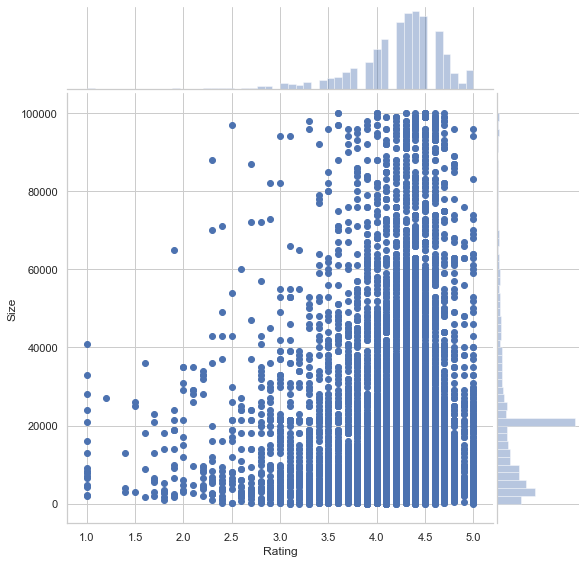

In [46]:
sns.set(style="whitegrid",color_codes=True);
sns.jointplot(x='Rating',y='Size',data=data , color="b",height=8, space=0.05);

### Do you see any patterns?

There isn't any corelation between the Size and Rating. Data is densely populated between 4 to 5 Ratings and 0 to 20000 Size.

### How do you explain the pattern?

Apps with size upto 20000 are rated on an average of 4.5. Also we can see a spike around Size value 21000 which indicate there are large number of apps with this size or it may contains outliers

## Effect of Price on Rating

### Make a jointplot (with regression line)

C:\Users\Tushar_Dalal\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


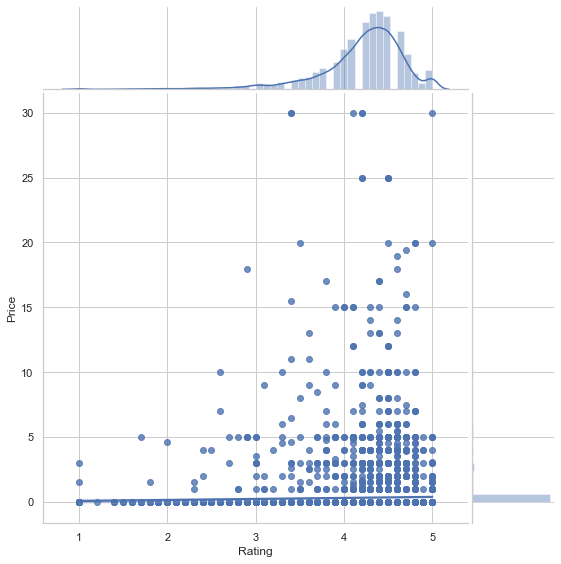

In [47]:
sns.set(style="whitegrid",color_codes=True);
sns.jointplot(x='Rating',y='Price',data=data,color="b",height=8, kind='reg',space=0.05);

### What pattern do you see?

There isn't any corelation between Price and Ratings.


### How do you explain the pattern?

Maximum data points are concentrated around Price value 0 (zero) for all Rating categories.


### Replot the data, this time with only records with price > 0

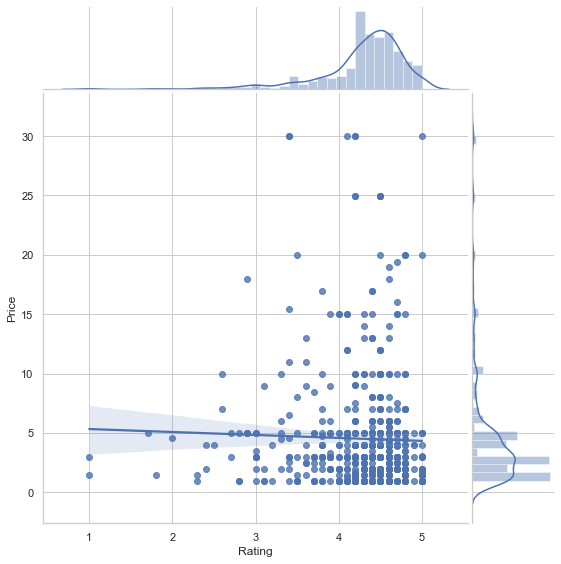

In [48]:
price_grt_zero = data[(data['Price']>0)]
sns.jointplot(x='Rating',y='Price',data=price_grt_zero , color="b",height=8, kind= 'reg' ,space=0.05);

### Does the pattern change?

There is no significant change in the pattern, but a slight negative corelation is observed.

### What is your overall inference on the effect of price on the rating

There isn't any direct effect of Price on the Rating.

## Look at all the numeric interactions together –

### Make a pairplort with the columns - 'Reviews', 'Size', 'Rating', 'Price'

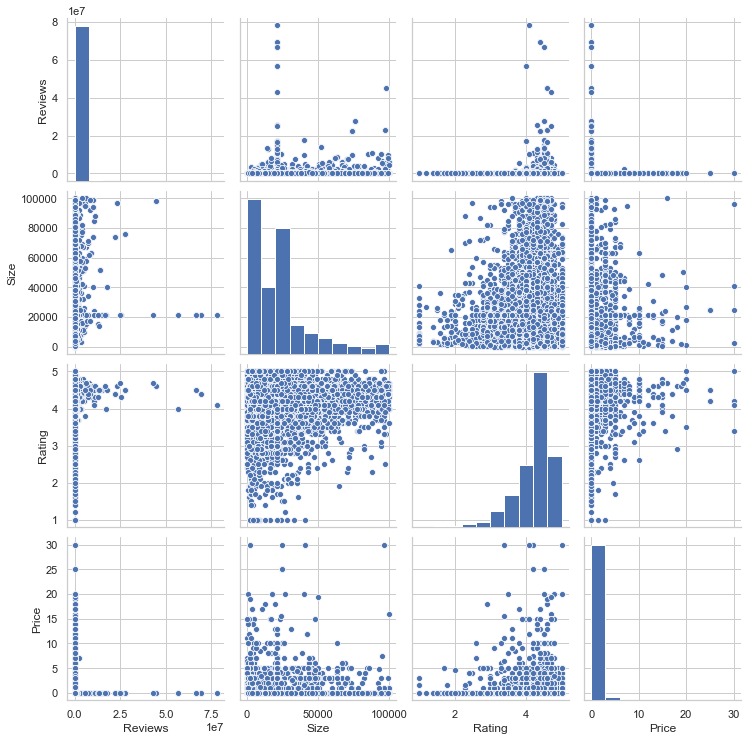

In [49]:
sns.pairplot(data,vars=['Reviews', 'Size', 'Rating', 'Price'],palette="husl");

## Rating vs. content rating

###  Make a bar plot displaying the rating for each content rating

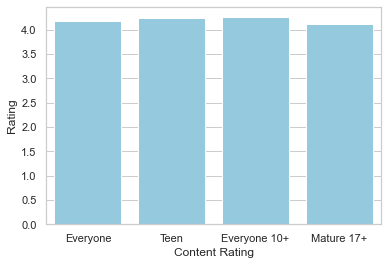

In [50]:
sns.barplot(x='Content Rating',y='Rating',data=data, ci=None, color='skyblue');

### Which metric would you use? Mean? Median? Some other quantile?

### Choose the right metric and plot
_Plotting barplot with __'MIN'__ metric to know the minimum rating for each Content Rating Category_

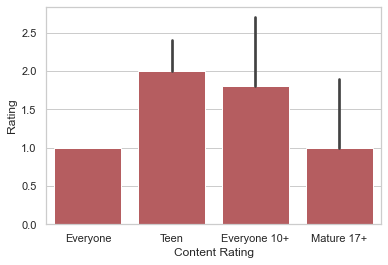

In [51]:
# from numpy import median
sns.barplot(x='Content Rating',y='Rating',data=data,estimator=min,color='r');

## Content rating vs. size vs. rating – 3 variables at a time

### Create 5 buckets (20% records in each) based on Size

In [52]:
data['size_bucket'] = pd.qcut(data['Size'], q=5)

In [53]:
data['size_bucket'].value_counts()

(14000.0, 21516.0]     2515
(5100.0, 14000.0]      1990
(7.999, 5100.0]        1889
(34000.0, 100000.0]    1835
(21516.0, 34000.0]     1112
Name: size_bucket, dtype: int64

In [54]:
data['size_bucket'] = pd.qcut(data['Size'], q=5,labels=['One','Two','Three','Four','Five'])

### By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

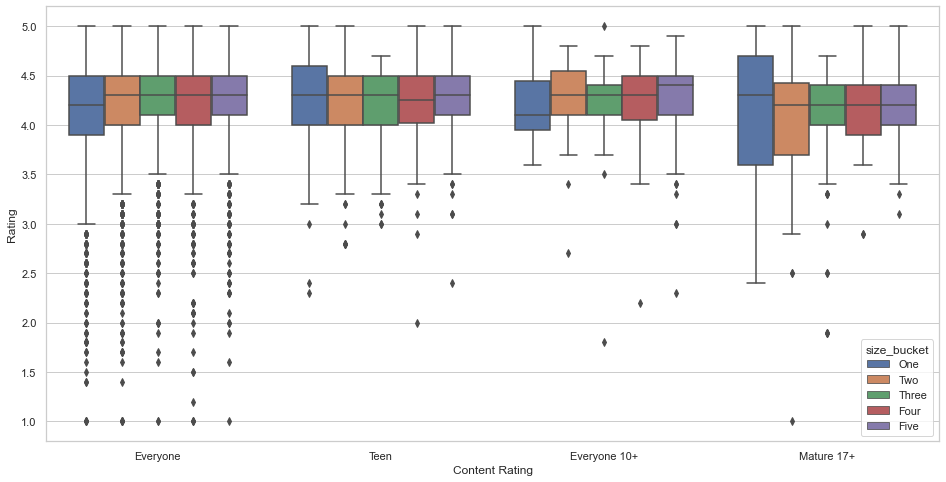

In [55]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Content Rating',y='Rating',hue='size_bucket',data=data);

### Make a heatmap of this
__i. Annotated  ii. Greens color map__

In [56]:
pivot = data.pivot_table(columns='Content Rating',index='size_bucket',values='Rating')

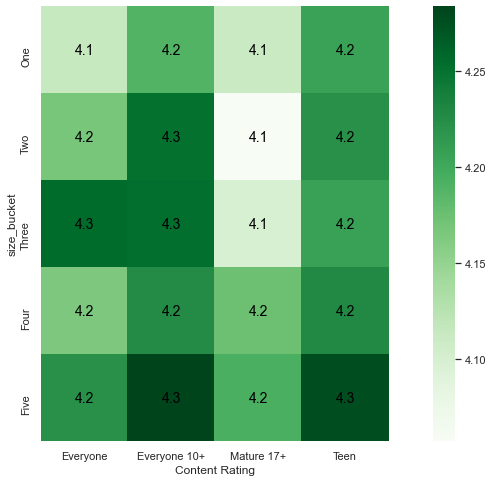

In [57]:
plt.figure(figsize=(16, 8))
ax = sns.heatmap(pivot, annot=True, cmap='Greens',annot_kws={"color":'black',"size":14},square=True)

### What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

Lighter apps are preferred in almost all categories and Heavier are more preferred in Teen category